# Introduction

This is a Capstone Project for the Google Data Analytics Professional Certificate.

For this scenario, Cyclistic is a bike-share company in Chicago that is looking to maximize the number of annual memberships.

I will be using the 6 phases of the analysis process (Ask, Prepare, Process, Analyse, Share and Act) to help guide my analysis of the datasets.

## Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Phase 1: Ask

**1. Identify the Business Task**

1. Identify trends in how casual riders and annual members use the Cyclistic bikes differently 
2. Analyze which factors could influence a casual rider's decision to buy an annual membership
3. Provide high quality recommendations for the marketing team to convert casual riders into annual members

**Questions to guide analysis**

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**2. Consider Key Stakeholders**

* Lily Moreno - director of marketing and your manager 
* Cyclistic marketing analytics team
* Cyclistic executive team


## Phase 2: Prepare

**1. Download data and store it appropriately.**

The historical trip data for each month of this past year has been downloaded from the provided [link](https://divvy-tripdata.s3.amazonaws.com/index.html) as .CSV files and has copies have been securely stored locally on my computer and on Github.

**2. Identify how it’s organized.**

The data is organized in 12 different files, where each file corresponds to the trip data for one month. All of these files are in a .CSV file. Each file has a total of 13 columns with the following names: "ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "member_casual"

**3. Sort and filter the data.**

During this step, the necessary packages will be loaded, the data will be imported into RStudio, where it will be sorted and filtered.

First, the necessary packages will be downloaded and loaded

In [1]:
knitr::opts_chunk$set(echo = TRUE)

In [2]:
# Install packages
suppressMessages({
    install.packages("tidyverse")
    install.packages("lubridate")
    install.packages("ggplot2")
    install.packages("dplyr")
    install.packages("geosphere")
    install.packages("janitor")
    install.packages("winch")
    install.packages("vctrs")
    install.packages("knitr")
    install.packages("lessR")
    install.packages("kableExtra")
    install.packages("ggmap")
    install.packages("conflicted")
    install.packages("IRdisplay")
})


The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages are in
	/var/folders/vc/7nt8vfq50rxgygj3cwbygd880000gn/T//RtmpizoagK/downloaded_packages

The downloaded binary packages 

In [3]:
#Load packages
suppressMessages({
    library(tidyverse)
    library(lubridate)
    library(ggplot2)
    library(dplyr)
    library(geosphere)
    library(janitor)
    library(winch)
    library(vctrs)
    library(knitr)
    library(lessR)
    library(kableExtra)
    library(ggmap)
    library(stats)
    library(conflicted)
    library(IRdisplay)
    conflicted::conflict_prefer("filter", "dplyr")
    conflicted::conflict_prefer("lag", "dplyr")
})

Next, the data will be imported

In [4]:
jan22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202201-divvy-tripdata.csv')
feb22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202202-divvy-tripdata.csv')
mar22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202203-divvy-tripdata.csv')
apr22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202204-divvy-tripdata.csv')
may22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202205-divvy-tripdata.csv')
jun22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202206-divvy-tripdata.csv')
jul22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202207-divvy-tripdata.csv')
aug22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202208-divvy-tripdata.csv')
sep22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202209-divvy-publictripdata.csv')
oct22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202210-divvy-tripdata.csv')
nov22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202211-divvy-tripdata.csv')
dec22 <- read.csv('/Users/Paulina_1/Documents/Data Analysis Certification Google/Case Studies/Case Study 1 - Cyclistic/Data/202212-divvy-tripdata.csv')

Then, the data will be checked for consistency

In [5]:
#Check column names for consistency
invisible({
    colnames(jan22)
    colnames(feb22)
    colnames(mar22)
    colnames(apr22)
    colnames(may22)
    colnames(jun22)
    colnames(jul22)
    colnames(aug22)
    colnames(sep22)
    colnames(oct22)
    colnames(nov22)
    colnames(dec22)
})

See structure

In [6]:
#Check consistency of structures
str(jan22)
str(feb22)
str(mar22)
str(apr22)
str(may22)
str(jun22)
str(jul22)
str(aug22)
str(sep22)
str(oct22)
str(nov22)
str(dec22)

'data.frame':	103770 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num

'data.frame':	785932 obs. of  13 variables:
 $ ride_id           : chr  "550CF7EFEAE0C618" "DAD198F405F9C5F5" "E6F2BC47B65CB7FD" "F597830181C2E13C" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2022-08-07 21:34:15" "2022-08-08 14:39:21" "2022-08-08 15:29:50" "2022-08-08 02:43:50" ...
 $ ended_at          : chr  "2022-08-07 21:41:46" "2022-08-08 14:53:23" "2022-08-08 15:40:34" "2022-08-08 02:58:53" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 42 42 41.8 ...
 $ end_lng           : num  -87.7 -87.6 -87.7 -87.7 -87.7 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...
'data.frame':	701339 obs. of  13 var

This verifies that all 12 data files contain the same 13 columns, and the data type for each column is the same across all 12 files. The columns "ride_id", "rideable_type", "started_at", "ended_at", "start_station_name", "start_station_id", "end_station_name", "end_station_id", "member_casual" are type chr. while the columns "start_lat", "start_lng", "end_lat", "end_lng" are type num.

After ensuring that all the data sets have the same number of columns and the same column names, the monthly data sets will be merged into a large dataframe.

In [7]:
year22 <- bind_rows(jan22, feb22, mar22, apr22, may22, jun22, jul22, aug22, sep22, oct22, nov22, dec22)

**4. Determine the credibility of the data**

The data credibility will be assessed using the **"ROCCC"** criteria by Google:

* **Reliability:** The data is reliable because even though Cyclistic is a fictional company, the data was obtained through a data license agreement with Lyft Bikes and Scooters, LLC (“Bikeshare”), who operates the City of Chicago’s (“City”) Divvy bicycle sharing service. They made their Bikeshare data available to the public.

* **Originality:** The data is not an original dataset as it was obtained through the Devvy webpage.

* **Comprehensiveness:** The data set is appropriate and provides the necessary information to answer the business task

* **Current:** The data is current as it reflect the data for each month of 2022.

* **Cited:** The source of the data is attributed to the Divvy bicycle sharing service by the Google Data Analytics Professional Certificate.

**Limitations of the data:** Due to the data privacy policy specified in the license agreement, the riders' personal information for identification has not been shared. Therefore, it's impossible to determine if the same rider has completed different trips, the analysis will be based on the ride_id for each trip. All ride_id values are unique in this dataset.

## Phase 3: Process

**1. Check Data for Errors**

In [8]:
invisible({
    #Preview the first 5 rows of the df
    head(year22)
    #Preview the last 6 rows of the df
    tail(year22)
    #Check names and data type of columns
    str(year22)
})

'data.frame':	5667717 obs. of  13 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-01-13 11:59:47" "2022-01-10 08:41:56" "2022-01-25 04:53:40" "2022-01-04 00:18:04" ...
 $ ended_at          : chr  "2022-01-13 12:02:44" "2022-01-10 08:46:17" "2022-01-25 04:58:01" "2022-01-04 00:33:00" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : nu

In [9]:
#Statistical summary of data
summary(year22)

   ride_id          rideable_type       started_at          ended_at        
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5667717     Length:5667717     Length:5667717     Length:5667717    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [10]:
#Check amount or rows
nrow(year22)
#Check column names
colnames(year22)
#Check dimensions of dataframe
dim(year22)
#Check how many different types of rideable_type there are
distinct(year22, rideable_type)
#Check that there are only members and casual riders in the member_casual category
distinct(year22, member_casual)
#Count the amount of trips that correspond to members and casual riders respectively
year22 %>%
  count(member_casual)
#Check how many NAs there are in each column
sapply(year22, function(x) sum(is.na(x)))

[1] 5667717

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5667717      13

rideable_type
<chr>
electric_bike
classic_bike
docked_bike


member_casual
<chr>
casual
member


member_casual,n
<chr>,<int>
casual,2322032
member,3345685


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5858               5858 
     member_casual 
                 0

In [11]:
#Check if the values missing for end_lat are located in the same rows as the values missing for end_lng
missing_end_lat <- which(is.na(year22$end_lat))
missing_end_lng <- which(is.na(year22$end_lng))
setequal(missing_end_lat, missing_end_lng)

[1] TRUE

In [12]:
#Check for duplicates in ride_id
duplicates_ride_id <- year22 %>%
  duplicated(year22, ride_id, incomparables = FALSE, fromLast = FALSE)

TRUE %in% duplicates_ride_id

[1] FALSE

From this, we can establish the following:

* There are no duplicated ride_id numbers
* The dimensions of the dataframe are 5,667,717 x 13
* The started_at and ended_at columns are in a datetime format of yyyy-mm-dd hh:mm:ss
* There are 3 different types of ride_type: electric_bike, classic_bike, and docked_bike
* There are 2,322,032 trips that correspond to casual riders
* There are 3,345,685	trips that correspond to members
* There are 5,858 values missing for the columns end_lat and end_lng, and they are located in the same rows


**2. Choose Your Tools**

RStudio will be used for the cleaning, transformation, visualization, and report of the data

**3. Transform the data so you can work with it effectively**

In [13]:
#Convert ended_at and started_at to POSIXct format to represent date-time values
year22$ended_at <- as.POSIXct(year22$ended_at, format = "%Y-%m-%d %H:%M:%S")
year22$started_at <- as.POSIXct(year22$started_at, format = "%Y-%m-%d %H:%M:%S")

The first step will be dividing the current datetime format into different columns for date, start time, end time, month, year, and day of the week:

In [14]:
year22 <- year22%>%
  mutate(date = format(as.Date(started_at), "%d")) %>% #Extract date
  mutate(start_time = format(started_at, format = "%H:%M:%S")) %>% #Extract start time
  mutate(end_time = format(ended_at, format = "%H:%M:%S")) %>% #Extract end time
  mutate(year = format(as.Date(started_at), "%Y")) %>% #Extract year
  mutate(month = format(as.Date(started_at), "%B")) %>% #Extract month
  mutate(day_of_week = format(as.Date(started_at), "%A")) #Extract day of week

Then, one more column will be added to include the length of the ride:

In [15]:
#Convert end_time and #start_time into POSIXct objects so that they represent time values
year22$end_time <- as.POSIXct(year22$end_time, format = "%H:%M:%S")
year22$start_time <- as.POSIXct(year22$start_time, format = "%H:%M:%S")

#Create an additional column that contains the time difference between the end time and the start time in order to determine the duration of the ride in seconds
year22 <- year22%>%
  mutate(ride_length = difftime(end_time, start_time))

In [16]:
#Inspect the structure of added columns
invisible({
    str(year22)
})

'data.frame':	5667717 obs. of  20 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

In order to run calculations, the column ride_length must be coverted into numeric

In [17]:
#Convert ride_length to numeric
year22$ride_length <- as.numeric(as.character(year22$ride_length))

#Confirm that the values in the column are numeric
is.numeric(year22$ride_length) 

[1] TRUE

In order to address the issue of missing latitude and longitude values in the "end_lat" and "end_lng" columns of the "year22" dataframe, we followed a systematic approach to replace these missing values with valid latitude and longitude coordinates. This was done in the following way:

1. Create a new dataframe called "valid_stations" by filtering the "year22" dataframe. The filtering process involved removing rows where the starting station's latitude ("start_lat") or longitude ("start_lng") values were missing (NA), as to only consider rows with complete station information.
2. Create a loop to go through each row of the "year22" dataframe. For each row, check if either the "end_lat" or "end_lng" value was NA.
3. If either of these values was missing (NA) for the current row, we proceeded to find a matching row in the "valid_stations" dataframe. We compared the "end_station_name" of the current row with the "start_station_name" in the "valid_stations" dataframe to identify potential matches. If a matching row was found, we accessed the corresponding latitude and longitude values from the first matching row in the "valid_stations" dataframe. These valid latitude and longitude values were then assigned to the "end_lat" and "end_lng" columns of the current row in the "year22" dataframe, effectively replacing the missing NA values.

In [18]:
# Create a filtered dataset with non-NA lat and lng values for the start stations
valid_stations <- year22 %>%
  filter(!is.na(start_lat) & !is.na(start_lng)) %>%
  select(start_station_name, start_lat, start_lng)

# Loop through each row in year22 to find and replace NA values in end_lat and end_lng
for (i in seq_len(nrow(year22))) {
  #Check if the "end_lat" or "end_lng" values are NA for the current row
  if (is.na(year22$end_lat[i]) || is.na(year22$end_lng[i])) { 
    #Creation of a logical vector (match_row) indicating which rows in valid_stations have the same station name as the current row's "end_station_name".
    match_row <- valid_stations$start_station_name == year22$end_station_name[i]
    #if there is a match, the end_lat and end_lng in year22 values are replaced with the lat and lng values in         the valid_stations dataframe
    if (any(match_row)) {
      year22$end_lat[i] <- valid_stations$start_lat[match_row][1]
      year22$end_lng[i] <- valid_stations$start_lng[match_row][1]
    }
  }
}

After this transformation, it's important to verify if there are any leftover NA values in the end_lng and end_lat columns.

In [19]:
# Identify row indices where the "end_lat" column has missing values (NA)
missing_end_lat_2 <- which(is.na(year22$end_lat))
# Identify row indices where the "end_lng" column has missing values (NA)
missing_end_lng_2 <- which(is.na(year22$end_lng))

# Display the structure of the "missing_end_lat_2" object to see the row indices
str(missing_end_lat_2)
# Display the structure of the "missing_end_lng_2" object to see the row indices
str(missing_end_lng_2)

 int(0) 
 int(0) 


Now that we have the latitude and longitude values updated for end_stations that previously had NA values by matching their names with start stations that had valid latitude and longitude values, we are left with the final dataframe.

Next, the ride distance in km will be added to the dataframe

In [20]:
#Calculate the distances between corresponding start and end points
year22$ride_distance <- distGeo(matrix(c(year22$start_lng, year22$start_lat), ncol=2), matrix (c(year22$end_lng, year22$end_lat), ncol=2))
#Convert to km
year22$ride_distance <- year22$ride_distance/1000

The last step of this phase will is removing "bad" data. In this case, the entries where the ride_length is negative or equal to 0

In [21]:
year22_clean <- year22[!(year22$ride_length <= 0),]

After the transformations and filters, several rows (105) now have NA values in 10 columns (started_at, ended_at, started_lat, start_lng, end_lat, end_lng, start_time, end_time, ride_length, ride_distance), so the rows that have NA values in all 10 columns will be deleted.

In [22]:
# Specify the columns with potential NA values
columns_with_na <- c("started_at", "ended_at", "start_lat", "start_lng", "end_lat", "end_lng", "start_time", "end_time", "ride_length", "ride_distance")

# Delete rows where all specified columns have NA values
year22_clean <- year22_clean[!(rowSums(is.na(year22_clean[, columns_with_na])) == length(columns_with_na)), ]

## Phase 4: Analyze

**Key Tasks**

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

**Deliverable**

1. A summary of your analysis

The first step will be checking the structure and obtaining a summary of the details of the newly generated cleaned version of the year22 dataframe.

In [23]:
str(year22_clean)
summary(year22_clean)

'data.frame':	5637311 obs. of  21 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXct, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

   ride_id          rideable_type        started_at                    
 Length:5637311     Length:5637311     Min.   :2022-01-01 00:00:05.00  
 Class :character   Class :character   1st Qu.:2022-05-28 18:52:05.00  
 Mode  :character   Mode  :character   Median :2022-07-22 15:44:17.00  
                                       Mean   :2022-07-20 08:07:11.69  
                                       3rd Qu.:2022-09-16 09:12:39.50  
                                       Max.   :2022-12-31 23:56:20.00  
    ended_at                      start_station_name start_station_id  
 Min.   :2022-01-01 00:01:48.00   Length:5637311     Length:5637311    
 1st Qu.:2022-05-28 19:13:02.00   Class :character   Class :character  
 Median :2022-07-22 16:02:50.00   Mode  :character   Mode  :character  
 Mean   :2022-07-20 08:24:36.57                                        
 3rd Qu.:2022-09-16 09:27:28.00                                        
 Max.   :2023-01-01 22:12:52.00                                 

Then, a descriptive analysis on the column ride_length must be performed. Here, the mean, median, max, and min for this column will be calculated. This will show us the average length of a ride, the midpoint number of the ride_length array, the longest ride, and the shortest ride. The descriptive analysis will be grouped by the type of rider (memebr or casual)

In [24]:
year22_clean %>% 
  group_by(member_casual) %>%
  summarise(average_ride_length = mean(ride_length), median_ride_length = median(ride_length), 
            max_ride_length = max(ride_length), min_ride_length = min(ride_length))

member_casual,average_ride_length,median_ride_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1260.8992,776,84509,1
member,731.7971,529,69947,1


The above data shows us unrealistic values for the maximum ride length and the minimum ride length for both types of riders. Since ride length is measured in seconds, these values make no sense in the context of this scenario. However, due to the scope of the project and the limitations imposed by the availability of the data, it's impossible to figure out the root cause of this problem. However, if possible, it should be analyzed further so action can be taken, and the analysis can be more effective.

The next step will be to compare the total rides taken by casual riders and members and visualize what percentage of the rides each group represents.

In [25]:
# Calculate ride_count and ride_percentage
year22_clean_summary <- year22_clean %>%
  group_by(member_casual) %>%
  summarise(ride_count = n(), ride_percentage = (n() / nrow(year22_clean)) * 100)
# Display the summary table using kable
html_table <- kable(year22_clean_summary, format = "html", caption = "Summary of ride_count and ride_percentage grouped by member_casual") %>%
  kable_styling(full_width = FALSE) # Adjust spacing
display_html(as.character(html_table))

member_casual,ride_count,ride_percentage
casual,2301986,40.83482
member,3335325,59.16518


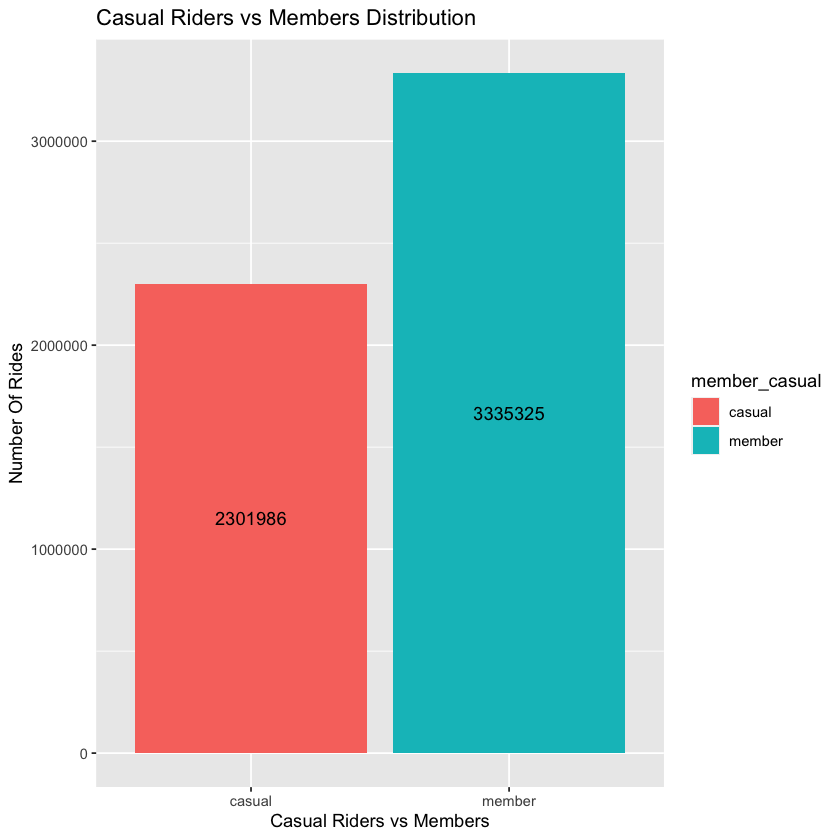

In [26]:
# Bar graph showing the total number of rides taken by each group of riders
ggplot(year22_clean_summary, aes(x = member_casual, y = ride_count, fill = member_casual)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = ride_count), position = position_stack(vjust = 0.5)) + 
  labs(x = "Casual Riders vs Members", y = "Number Of Rides", title = "Casual Riders vs Members Distribution")

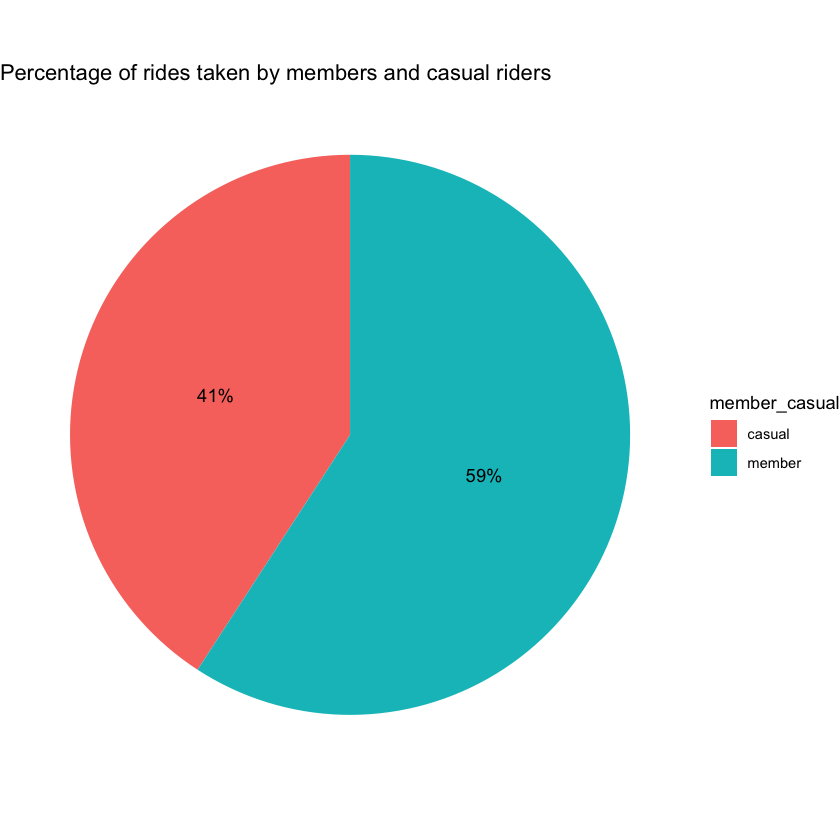

In [27]:
ggplot(year22_clean_summary, aes(x = "", y = ride_percentage, fill = member_casual)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(ride_percentage), "%")), position = position_stack(vjust = 0.5)) + 
  labs(title = "Percentage of rides taken by members and casual riders", x = NULL, y = NULL) +
  theme_void()

Here we can observe that, based on this data, members account for a larger percentage of the rides taken compared to casual riders in the year 2022.

The next step will be comparing these two groups based on the ride_length of their trips. For this, the mean, median, maximum, and minimum for these groups will be calculated.

In [28]:
#Calculate mean, median, max, and min for each casual riders and for members
year22_clean %>%
  group_by(member_casual) %>% 
  summarise(average_ride_length = mean(ride_length), median_length = median(ride_length), 
            max_ride_length = max(ride_length), min_ride_length = min(ride_length))

member_casual,average_ride_length,median_length,max_ride_length,min_ride_length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
casual,1260.8992,776,84509,1
member,731.7971,529,69947,1


From the table above, we can observe that, on average, the duration of the trips (also known as ride_length) was longer compared to that of members.

Subsequently, we will see the total rides and average ride_length by each day for members and casual riders.

In [29]:
#Order the days of the week
year22_clean$day_of_week <- ordered(year22_clean$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

#Calculates the number of rides and average duration per day of the week 
year22_clean %>% 
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_rides = n(), average_ride_length = mean(ride_length),.groups="drop") %>% 
  arrange(member_casual, day_of_week)

member_casual,day_of_week,number_of_rides,average_ride_length
<chr>,<ord>,<int>,<dbl>
casual,Sunday,421849,1415.5142
casual,Monday,276368,1309.6909
casual,Tuesday,259984,1147.1270
casual,Wednesday,263584,1092.0577
casual,Thursday,298604,1126.9374
casual,Friday,329043,1172.9389
casual,Saturday,452554,1403.0224
member,Sunday,406227,811.9630
member,Monday,445168,713.3966


It's important to visualize the data shown in the table above.

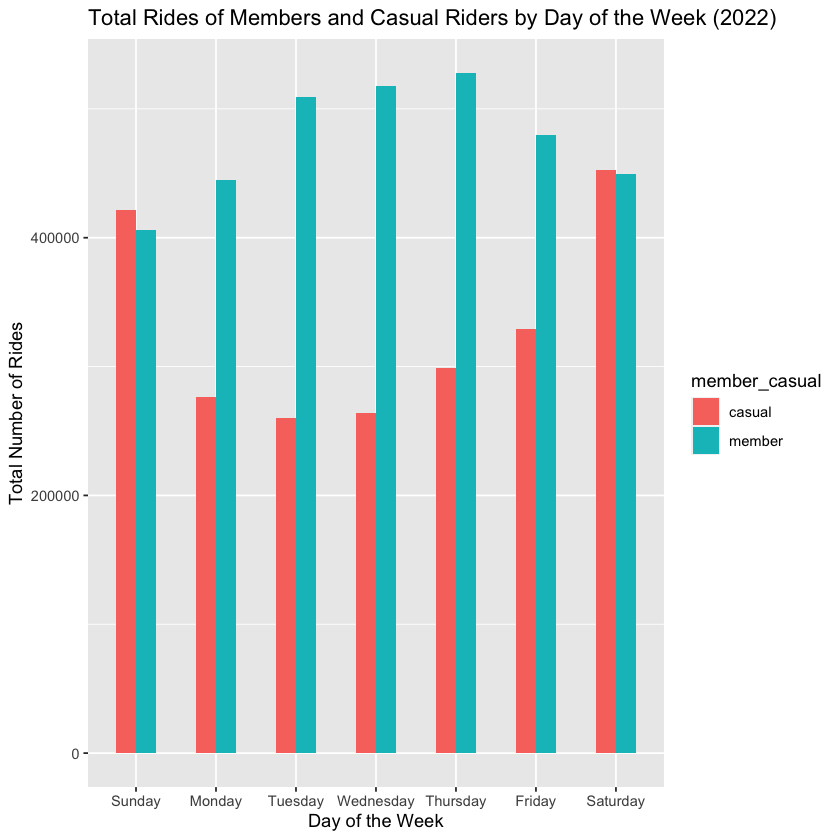

In [30]:
year22_clean %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n(), .groups="drop") %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total Rides of Members and Casual Riders by Day of the Week (2022)", x = "Day of the Week", y = "Total Number of Rides") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) 

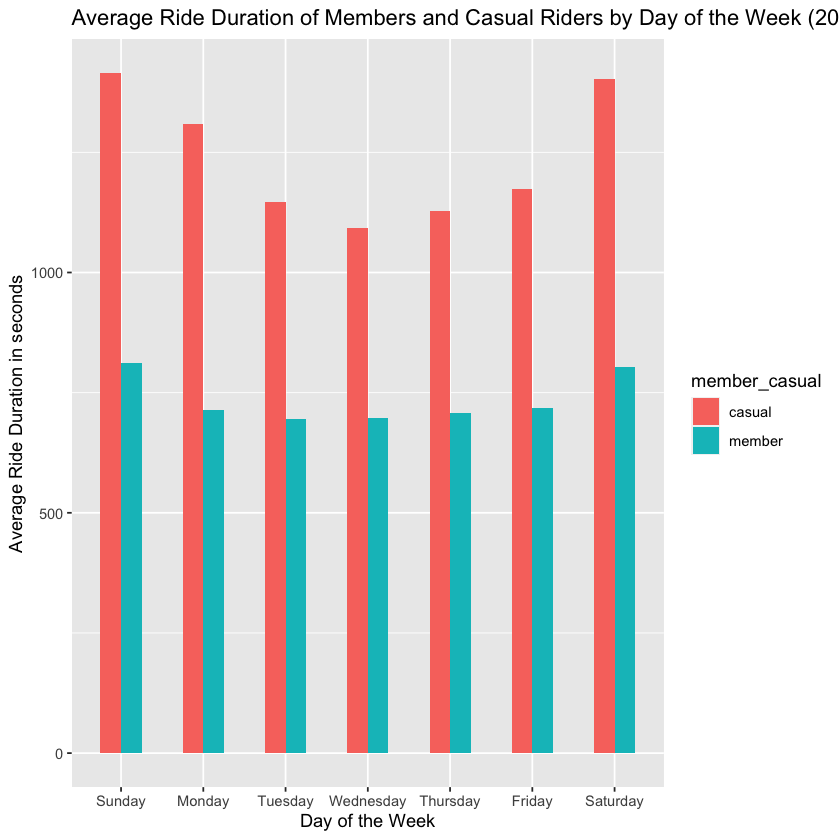

In [31]:
year22_clean %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(average_ride_length = mean(ride_length), .groups="drop") %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = average_ride_length, fill = member_casual)) +
  labs(title ="Average Ride Duration of Members and Casual Riders by Day of the Week (2022)", x = "Day of the Week", y = "Average Ride Duration in seconds") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) 

From the above graphs, it is observed that members have a more consistent number of rides throughout the week, while casual riders have a significantly higher number of rides during the weekend (Saturday and Sunday). Additionally, Monday through Friday shows that there is a considerable difference between the number of rides taken by members compared to those taken by casual riders. However, casual riders show a slightly higher number of rides on Saturday and Sunday compared to members.

In terms of the average duration of the trip (average_length), casual riders, on average, have longer rides throughout the week compared to members. The duration of the trips for members is fairly consistent throughout the week, with the highest average duration on the weekend. However, for casual riders, there is a more significant difference between the average duration of their trips on weekdays (Monday-Friday) compared to that of the weekends (Saturday and Sunday).

Proceeding with the analysis, we will visualize the total number of rides taken by members and casual riders by month, as well as the average ride length by members and casual riders by month.

In [32]:
# Order the months of the year.
year22_clean$month <- ordered(year22_clean$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

#Calculates the number of rides and average duration per month
year22_clean %>% 
  group_by(member_casual, month) %>%  
  summarise(number_of_rides = n(), average_ride_length = mean(ride_length), .groups="drop") %>% 
  arrange(member_casual, month)

member_casual,month,number_of_rides,average_ride_length
<chr>,<ord>,<int>,<dbl>
casual,January,18711,972.1311
casual,February,20956,1123.9708
casual,March,89302,1365.3452
casual,April,124887,1326.0912
casual,May,275912,1460.6367
casual,June,364043,1350.3013
casual,July,402981,1345.3485
casual,August,356200,1249.1048
casual,September,295013,1163.9678


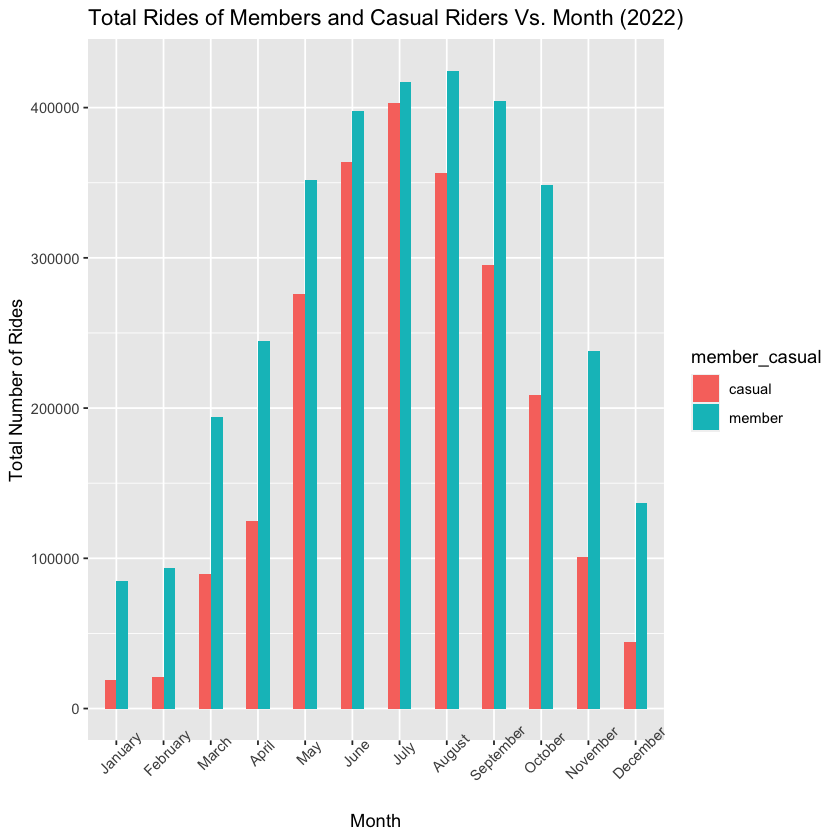

In [33]:
year22_clean %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), .groups="drop") %>%
  arrange(member_casual, month) %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title = "Total Rides of Members and Casual Riders Vs. Month (2022)", x = "Month", y = "Total Number of Rides") + 
  geom_col(width=0.5, position = position_dodge(width=0.5)) 

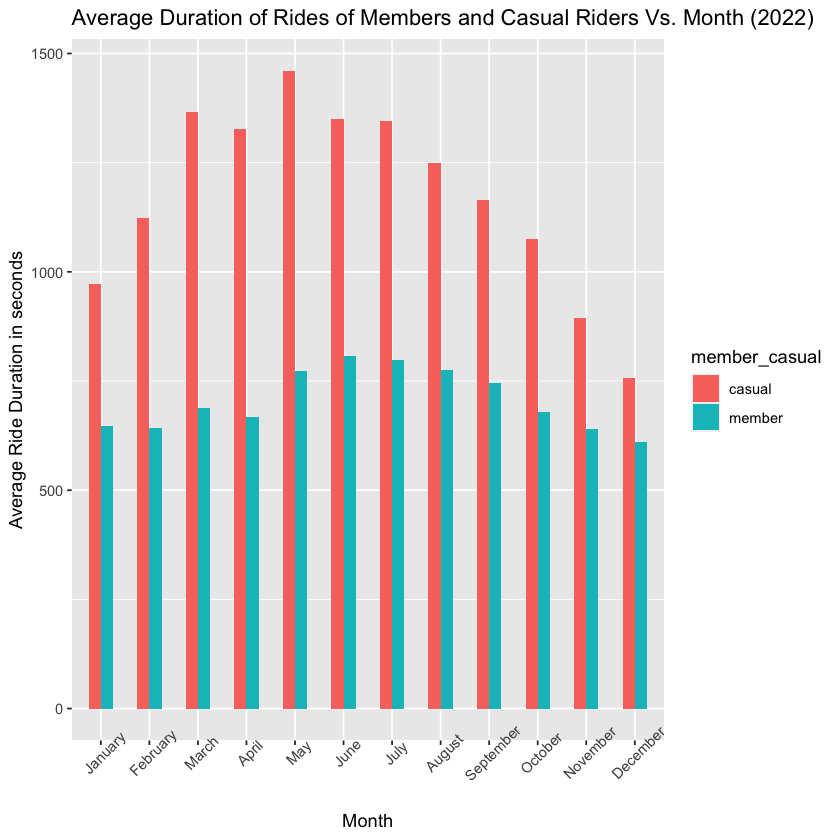

In [34]:
year22_clean %>%
  group_by(member_casual, month) %>%
  summarise(average_ride_length = mean(ride_length), .groups="drop") %>%
  arrange(member_casual, month) %>% 
  ggplot(aes(x = month, y = average_ride_length, fill = member_casual)) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title = "Average Duration of Rides of Members and Casual Riders Vs. Month (2022)", x = "Month", y = "Average Ride Duration in seconds") + 
  geom_col(width=0.5, position = position_dodge(width=0.5)) 

From these graphs, it can be observed that the months with the most amount of rides for both casual riders and members are May, June, July, August, and September, while there is a clear drop in the months of January, February, and December. This drop could be due to the winter conditions of the area, however further analysis would be necessary. We can see that the number of rides taken by members is higher throughout the entire year, but the number of rides taken by casual riders comes close to that of members during the months of June and July. Additionally, there is a wider range of total number of trips taken by casual riders compared to that of members. 

The average duration of the rides taken by casual members is higher throughout the entire year compared to that of members. It can also be observed that the duration of the rides of members stays pretty consistent throughout the year, with the highest average duration taking place between May and September, while casual riders have a more varied average duration of their trips throughout the year, with the highest average duration taking place between March and July.

A comparison between members and casual riders the distance traveled during their trips is necessary to continue the analysis.

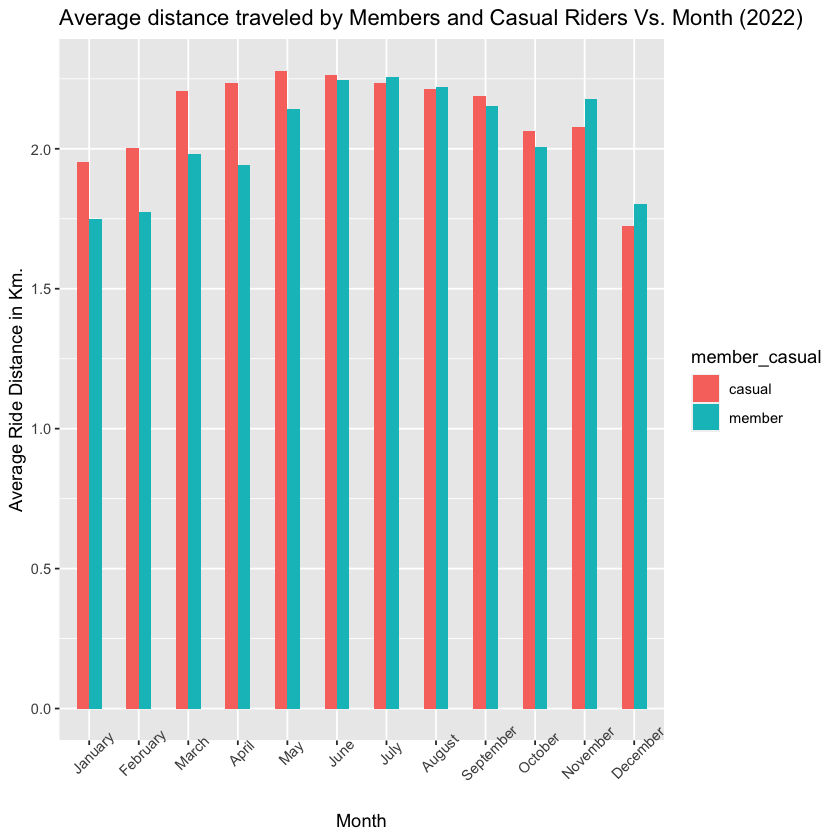

In [35]:
year22_clean %>%
  group_by(member_casual, month) %>%
  summarise(average_ride_distance = mean(ride_distance), .groups="drop") %>%
  arrange(member_casual, month) %>%
  ggplot(aes(x = month, y = average_ride_distance, fill = member_casual)) + 
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title = "Average distance traveled by Members and Casual Riders Vs. Month (2022)", x = "Month", y = "Average Ride Distance in Km.") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) 

From the above chart we can see that both casual riders and members have pretty similar average distance traveled, but the casual riders have a slightly higher average compared to that of members for most of the year, with the only exceptions being July, August, November, and December. The average distance traveled by both types of riders remains fairly consistent throughout the year.

Another important comparison point between casual riders and members is the breakdown of the number of rides taken by hour of the day by these two groups.

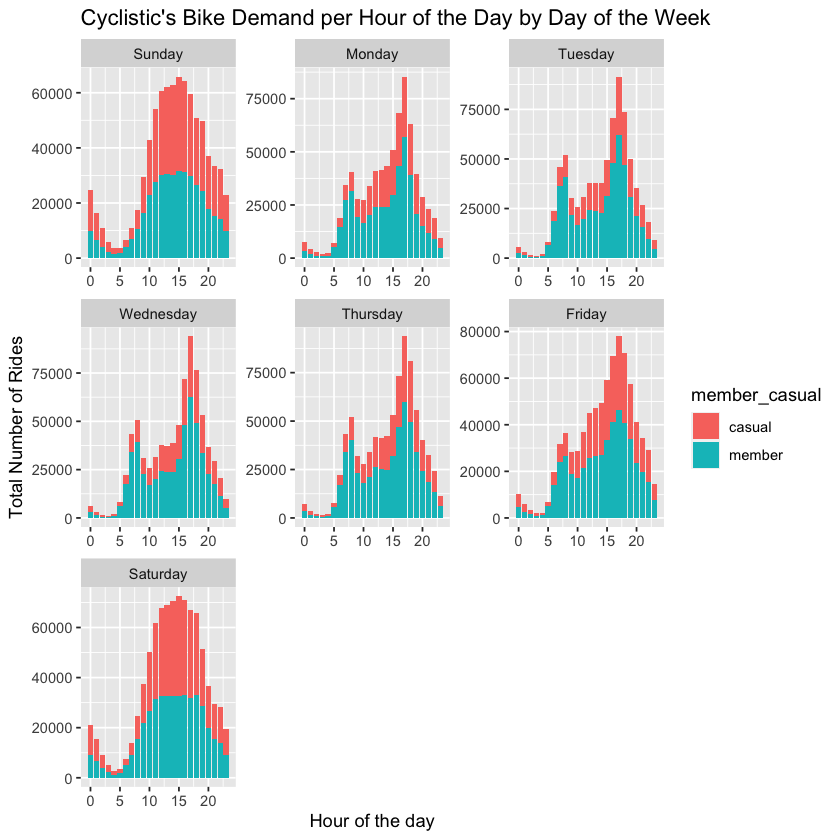

In [36]:
# Extract hour from start_time
year22_clean <- year22_clean %>%
  mutate(hour_of_day = hour(start_time))

# Create the plot
ggplot(year22_clean, aes(hour_of_day, fill = member_casual)) +
  geom_bar() +
  labs(title = "Cyclistic's Bike Demand per Hour of the Day by Day of the Week", x = "Hour of the day", y = "Total Number of Rides") +
  facet_wrap(~day_of_week, scales = "free")

From this graph it can be observed that during weekdays, most of the riders are members, while on weekends, the distribution of casual riders compared to members is fairly even. During weekdays, there are peaks in the number of rides taken by members between 6 a.m. and 9 a.m., as well as between 4 p.m. and 7 p.m. During the weekend, however, both members and casual riders use the bikes pretty steadily throughout the day between 10 a.m. and 7 p.m. 

Based on the data analysis, a plausible hypothesis can be formulated, indicating that on weekdays, members predominantly utilize the bikeshare service as a mode of transportation for their daily commute between their residence and workplace. In contrast, the noticeable surge in casual riders during the weekends suggests that they primarily employ the service for recreational or leisure activities.

The next step in the analysis will be comparing the usage of different rideable_type by both, members and casual riders.

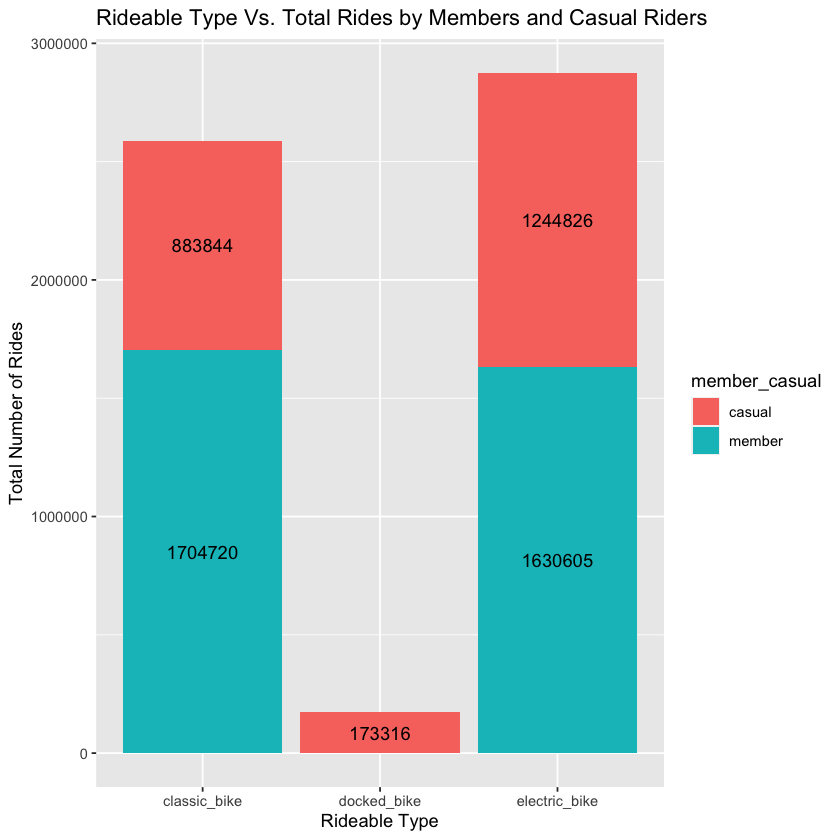

In [37]:
ride_counts <- year22_clean %>%
  group_by(rideable_type, member_casual) %>%
  summarise(count = n(), .groups = "drop")

ggplot(year22_clean, aes(rideable_type, fill = member_casual, .groups="drop" )) +
  geom_bar() + 
  geom_text(data = ride_counts, aes(label = count, y = count), position = position_stack(vjust = 0.5)) +
  labs(title = "Rideable Type Vs. Total Rides by Members and Casual Riders", x = "Rideable Type", y = "Total Number of Rides")

The graph above illustrates that docked bikes are primarily utilized by casual riders. Members, on the other hand, exhibit a preference for classic bikes, closely followed by electric bikes. Conversely, casual riders show a preference for electric bikes, followed by classic bikes, with only a small number of rides taken on docked bikes.

The final step of the analysis involves analyzing and visualizing coordinate data of the rides taken by casual riders and members. Here, rides that started and ended at teh same station will be filtered out if they have a ride duration under 5 minutes since this would most likely indicate that the ride never took place. 

In [38]:
#Create a new data frame only for the most popular routes (routes with more than 75 rides)
coordinates_df <- year22_clean %>% 
  #filter out rows that have the same starting and ending station AND a ride length of under 5 minutes
  filter((start_lng != end_lng | start_lat != end_lat) & (ride_length < 300)) %>%
  group_by(start_lng, start_lat, end_lng, end_lat, member_casual, rideable_type) %>%
  summarise(total_rides = n(),.groups="drop") %>%
  filter(total_rides > 75)

#Create two different data frames depending on rider type (member_casual)
casual_riders <- coordinates_df %>% filter(member_casual == "casual")
member_riders <- coordinates_df %>% filter(member_casual == "member")

In [39]:
suppressMessages({
    #The bounding box for Chicago was obtained using Google Maps
    chicago <- c(left = -87.7530440694528, bottom = 41.669374586045535, right = -87.53573322225571, top = 41.99747022811183)
    #Specify the bounding box of the map
    map_of_chicago <- get_stamenmap(bbox = chicago, zoom = 13, maptype = "terrain")
})

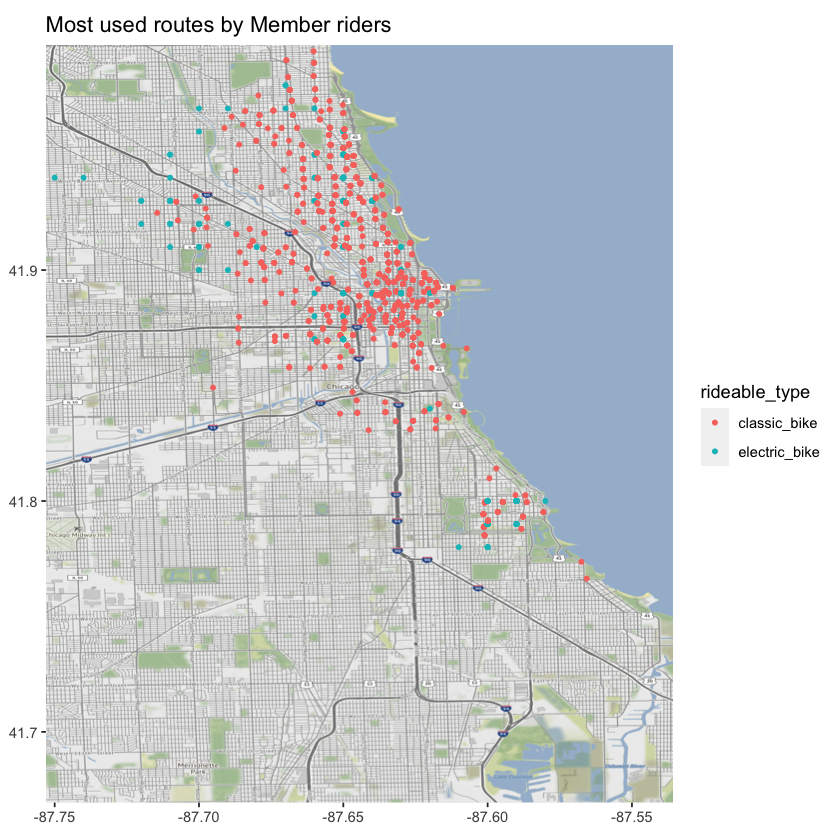

In [40]:
suppressMessages({
   #Casual Riders Map
    ggmap(map_of_chicago, darken = c(0.1, "white")) +
       geom_point(casual_riders, mapping = aes(x = start_lng, y = start_lat, color = rideable_type), size = 1) +
       coord_fixed(0.8) +
       labs(title = "Most used routes by Casual riders",x = NULL, y = NULL) +
       theme()

    #Members Map
    ggmap(map_of_chicago, darken = c(0.1, "white")) +
        geom_point(member_riders, mapping = aes(x = start_lng, y = start_lat, color = rideable_type), size = 1) +  
        coord_fixed(0.8) +
        labs(title = "Most used routes by Member riders", x = NULL, y = NULL) +
        theme() 
})

These maps show that members have a higher volume of rides that match the criteria to be included in the map (if the ride starts and ends in the same location, it must be at least 5 minutes long, and there must be at least 75 rides that start in that location). For the most popular routes, members prefer classic bikes while casual riders show no clear preference between classic bikes and electric bikes. Fowever, for casual riders, classic bikes tend to be more common for rides downtown, while electric bikes are more common in rides further away from the city center.

Casual riders tend to focus in lumps around different parts of the city, probably around historical landmarks or leisure points, while members routes are scattered all over the city, which could be related to commutes to and from the workplace. 

## Phase 5 Share

**Key Tasks**

1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.

**Deliverable**

1. Supporting visualizations and key findings

This phase was completed using RStudio and Tableau for visualizations, as well as Microsoft PowerPoint for the creation of a presentation to present the findings. 

The RStudio visualiztions can be found above, and the Tableau visualizations, which were created using the clean data, can be found in the following links: [Dashboard 1](https://public.tableau.com/app/profile/paulina.remis/viz/CyclisticDashboard_16911027660430/Dashboard1?publish=yes) and [Dashboard 2](https://public.tableau.com/app/profile/paulina.remis/viz/CyclisticDashboard_16911027660430/Dashboard2?publish=yes).

The PowerPoint presentation will use the visualizations created in Tableau and it will be available in this [link](https://1drv.ms/p/s!AhAyWK7n3KINgi-_UXijEvDLpoR8)

Although it can be accessed through the presentation, this is some of the most relevant information that can be drawn from the analysis:

**Key Insights**

* Members account for the biggest proportion of rides (59.17% compared to 40.83%)
* Throughout the entire year, the amount of rides taken by Members is greater
* On weekdays, members exhibit a distinct pattern during the hours with the highest ride volume.
* The average ride distance covered for both types of rides is very similar and consistent throughout the year
* There are more riders in the afternoon than there are in the mornings
* The month of the year is an important factor that impacts the amount of rides and the duration of the rides

**Differences between Casual Riders and Members & Conclusions**

* Members prefer to ride during the week while Casual Riders show a clear preference for riding during the weekends
* While the average distance traveled was similar, there was a clear difference between the ride length of Casual Riders and Members, with Casual Riders exhibiting significantly higher ride lengths. This is consistent with leisure activity performed by Casual Riders
* Members use the bikes in more fixed routines, reflected by the amount of start stations that have at least 75 rides, while Casual Riders show more distinct activities.
* Casual Riders mostly use the stations located within the city’s center and bay areas, while Members show a more scattered distribution throughout the city.
* Members prefer casual bikes while Casual Riders prefer electric bikes.
* Casual riders are the only ones using the docked bikes.

## Phase 6: Act

The Act stage will be carried out by Lily Moreno, the Cyclistic marketing analytics team, and the Cyclistic Executive Team. 

Based on the analysis, the top 3 recommendations for these teams are the following:

1. Offer different types of memberships. Since casual riders prefer riding on the weekends, and there is a significant difference in the amount of rides taken during the winter months compared to the rest of the year, monthly memberships or weekend-only annual memberships could help attract a larger amount of Members.
2. Since the most popular start and end stations are known, marketing ads and campaigns could be targeted to these stations via billboards or posters.
3. Financial incentives via coupons or discounts could be provided for the usage of electric bikes if the rider has an annual membership. This would be a great incentive for casual riders to join since they already prefer electric bikes, and it could be an incentive for current members to transition to electric bikes.

These actionable steps are also available via the presentation mentioned in Phase 5.